In [202]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import librosa
import soundfile
import keras
import librosa.display
import IPython.display as ipd

In [203]:
df_tp = pd.read_csv('/home/birdsong/kaggle-data/train_tp.csv')
df_fp = pd.read_csv('/home/birdsong/kaggle-data/train_fp.csv')
display(df_tp)
display(df_fp)

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70
...,...,...,...,...,...,...,...
1211,fe8d9ac40,13,1,53.4720,93.750,54.0960,843.75
1212,fea6b438a,4,1,43.5787,2531.250,45.7653,4031.25
1213,ff2eb9ce5,0,1,15.2267,5906.250,16.0213,8250.00
1214,ffb8d8391,5,1,14.3467,4781.250,16.6987,10406.20


,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,00204008d,21,1,13.8400,3281.2500,14.9333,4125.0000
1,00204008d,8,1,24.4960,3750.0000,28.6187,5531.2500
2,00204008d,4,1,15.0027,2343.7500,16.8587,4218.7500
3,003b04435,22,1,43.2533,10687.5000,44.8587,13687.5000
4,003b04435,23,1,9.1254,7235.1562,15.2091,11283.3984
...,...,...,...,...,...,...,...
7776,ffd88cd84,14,1,3.2000,2531.2500,3.7867,5531.2500
7777,ffebe7313,1,1,35.2000,3843.7500,36.0960,5625.0000
7778,fff163132,17,4,22.5547,1312.5000,25.0880,7406.2500
7779,fff163132,14,1,37.0827,2531.2500,37.6693,5531.2500


#### Bird and frog songs lie between tmin and tmax. The following code either picks a random clip  of  (cliplength) seconds  containing the song between [tmin, tmax] OR (If tmax - tmin > (cliplength)) picks the first (cliplength) seconds from [tmin,tmax]

In [207]:
#load train_tp.csv into a pandas df
#loop through each row of the df (supposedly inefficient, but seems necessary here)
for index, row in df_tp.iterrows():
    infile =  '/home/birdsong/kaggle-data/train/%s.flac' %row['recording_id']
    outfile = '/home/birdsong/processed_data/clips_tp/%d.flac' %index 
    sig, sr = librosa.load(infile)
    tmin = row['t_min']*sr 
    tmax = row['t_max']*sr
    #os.system('clear')
    #print(index)
    clip_length = 1 #No. of seconds
    l = len(sig)
    if tmax - tmin < clip_length*sr:
        if  tmax - clip_length*sr > 0:
            upper = np.random.randint(tmax, min(tmin + clip_length*sr,l-1)) 
            lower = upper - clip_length*sr
        else:
            lower = np.random.randint(0, tmin)
            upper = lower + clip_length*sr
    else:
        #pick first clip_length seconds
        lower = round(tmin) 
        upper = round(tmin + clip_length*sr)
        #or pick middle segment
        #lower = round(tmin + (tmax - tmin - clip_length*sr)/2)
        #upper = round(tmax - (tmax - tmin - clip_length*sr)/2)
    sig = sig[lower:upper]
    
    #Uncomment to use moving average filter
    #window = 70
    #post_sig = np.asarray([(sum(sig[y:y+window])/window) for y in range(len(sig)-window)])
    
    # uncomment to actually write files
    soundfile.write(outfile, sig, sr)


In [208]:
for index, row in df_fp.iterrows():
    infile =  '/home/birdsong/kaggle-data/train/%s.flac' %row['recording_id']
    outfile = '/home/birdsong/processed_data/clips_fp/%d.flac' %index 
    sig, sr = librosa.load(infile)
    tmin = row['t_min']*sr 
    tmax = row['t_max']*sr
    #os.system('clear')
    #print(index)
    clip_length = 1 #No. of seconds
    l = len(sig)
    if tmax - tmin < clip_length*sr:
        if  tmax - clip_length*sr > 0:
            upper = np.random.randint(tmax, min(tmin + clip_length*sr,l-1)) 
            lower = upper - clip_length*sr
        else:
            lower = np.random.randint(0, tmin)
            upper = lower + clip_length*sr
    else:
        #pick first clip_length seconds
        lower = round(tmin) 
        upper = round(tmin + clip_length*sr)
        #or pick middle segment
        #lower = round(tmin + (tmax - tmin - clip_length*sr)/2)
        #upper = round(tmax - (tmax - tmin - clip_length*sr)/2)
    sig = sig[lower:upper]
    
    #Uncomment to use moving average filter
    #window = 70
    #post_sig = np.asarray([(sum(sig[y:y+window])/window) for y in range(len(sig)-window)])
    
    # uncomment to actually write files
    soundfile.write(outfile, sig, sr)

#### Test Spectrograms

In [241]:
sig,sr = librosa.load('/home/birdsong/processed_data/clips_tp/754.flac')

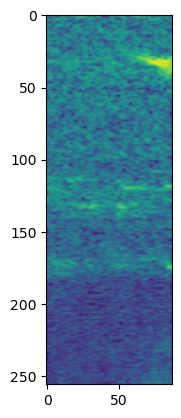

(256, 87)

In [244]:
mel_spectrogram = librosa.feature.melspectrogram(y = sig, sr=sr, n_fft=2048, hop_length=256, n_mels=256,  fmin= 64, fmax = 7000)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.imshow(log_mel_spectrogram)
plt.show()
log_mel_spectrogram.shape

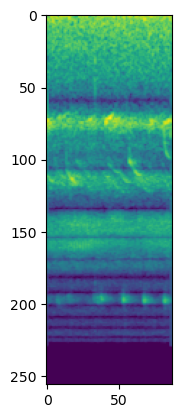

(256, 87)

In [243]:
mel_spectrogram = librosa.feature.melspectrogram(y = post_sig, sr=sr, n_fft=2048, hop_length=512, n_mels=256,  fmin= 64, fmax = 16384)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.imshow(log_mel_spectrogram)
plt.show()
type(log_mel_spectrogram)
log_mel_spectrogram.shape

### Generate Spectrograms

In [211]:
spectrograms = []
probabilities = []
labels = []
labels_fp_are_tp = []
frog_or_bird = []
for index, row in df_tp.iterrows():
    infile = '/home/birdsong/processed_data/clips_tp/%d.flac' %index 
    sig, sr = librosa.load(infile)
    mel_spectrogram = librosa.feature.melspectrogram(y = sig, sr=sr, n_fft=2048, hop_length=1024, n_mels=64,  fmin= 64, fmax = 16384)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    spectrograms.append(log_mel_spectrogram.reshape(64*22))
    prob = np.zeros(24, dtype = np.float16)
    prob[row["species_id"]] = 1
    labels.append(str(row["species_id"])+str(row["songtype_id"]))
    labels_fp_are_tp.append(str(row["species_id"])+str(row["songtype_id"]))
    if row["species_id"] in [0, 1, 2, 3, 4, 8, 12, 14, 16, 18, 21]:
        frog_or_bird.append('frog')
    else:
        frog_or_bird.append('bird')
    probabilities.append(prob)

In [212]:
for index, row in df_fp.iterrows():
    infile = '/home/birdsong/processed_data/clips_fp/%d.flac' %index 
    sig, sr = librosa.load(infile)
    mel_spectrogram = librosa.feature.melspectrogram(y = sig, sr=sr, n_fft=2048, hop_length=1024, n_mels=64,  fmin= 64, fmax = 16384)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    spectrograms.append(log_mel_spectrogram.reshape(64*22))
    prob = np.ones(24, dtype = np.float16)/23
    prob[row["species_id"]] = 0
    labels.append('-1')
    labels_fp_are_tp.append(str(row["species_id"])+str(row["songtype_id"]))
    if row["species_id"] in [0, 1, 2, 3, 4, 8, 12, 14, 16, 18, 21]:
        frog_or_bird.append('frog')
    else:
        frog_or_bird.append('bird')
    probabilities.append(prob)

In [213]:
X = np.array(spectrograms)
p = np.array(probabilities)
y = np.array(labels)

In [219]:
#pd.DataFrame(X).to_csv('/home/birdsong/processed_data/spectrograms/spectrograms_1sec.csv')
#pd.DataFrame(y).to_csv('/home/birdsong/processed_data/spectrograms/labels.csv')
#pd.DataFrame(p).to_csv('/home/birdsong/processed_data/spectrograms/probabilities.csv')
#pd.DataFrame(np.array(frog_or_bird)).to_csv('/home/birdsong/processed_data/spectrograms/frog_or_bird.csv')
pd.DataFrame(np.array(labels_fp_are_tp)).to_csv('/home/birdsong/processed_data/spectrograms/labels_fp_are_tp.csv')

In [216]:
print(labels_fp_are_tp)

['141', '231', '121', '174', '101', '81', '01', '181', '151', '11', '61', '101', '71', '01', '111', '111', '131', '121', '164', '164', '164', '01', '181', '191', '174', '71', '61', '31', '234', '234', '141', '101', '111', '21', '41', '01', '121', '01', '31', '121', '151', '81', '101', '11', '164', '71', '221', '121', '231', '191', '71', '91', '121', '61', '211', '174', '171', '174', '131', '11', '21', '151', '21', '181', '01', '31', '131', '111', '181', '21', '201', '181', '151', '181', '231', '151', '151', '171', '81', '91', '31', '11', '211', '101', '11', '111', '11', '141', '11', '71', '131', '81', '131', '31', '181', '131', '91', '191', '11', '01', '164', '181', '234', '234', '21', '31', '234', '234', '141', '141', '11', '141', '221', '201', '164', '164', '51', '41', '164', '61', '221', '221', '81', '51', '71', '121', '191', '61', '164', '71', '234', '121', '141', '141', '11', '221', '101', '61', '121', '61', '211', '151', '121', '61', '151', '71', '164', '221', '111', '81', '181',

In [218]:
len(labels_fp_are_tp)

8997